Analytic Report project

Given the dataset, create an analytic report to answer three below questions. The report should include the introduction, describing the data, analysis and conclusions.
1.	How does blood pressure and cholesterol relate to each other? (how to know if datas are related)
2.	Do men tend to have higher blood pressure than women? What about cholesterol?
3.	What contribute to causing heart disease (age, cholesterol, blood pressure)? Is it the effect the same for both sex (male and female)?

In [1]:
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plot
#enable IPython to display matplotlib graphstface
%matplotlib inline 
path = 'D:\Documents\GitHub\Machine-Learning-Course\Assignment\Analytic Project\Cardiology.xls'
sn= 'Sheet1'
data = pd.read_excel(path,sheetname = sn,  skiprows =range(1,3)) #row2 -> row3 are skipped

In [2]:
data.describe()

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,3.155116,131.623762,246.264026,0.148515,0.983498,149.646865,0.326733,1.039604,1.600660,0.666667,4.735974,0.544554
std,9.082101,0.466011,0.958941,17.538143,51.830751,0.356198,0.994883,22.905161,0.469794,1.161075,0.616226,0.933790,1.940231,0.498835
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,274.500000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [3]:
data.shape

(303, 14)

In [4]:
dataFrame  = pd.DataFrame(data)
dataFrame = dataFrame[['age', 'sex', 'blood pressure', 'cholesterol','class']]
dataFrame.describe()

,age,sex,blood pressure,cholesterol,class
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.544554
std,9.082101,0.466011,17.538143,51.830751,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [5]:
def printHistogram(data, binsValue, title, xlabel, ylabel):
    hist_plot = data.hist(bins=binsValue)
    hist_plot.set_title(title)
    hist_plot.set_xlabel(xlabel)
    hist_plot.set_ylabel(ylabel)

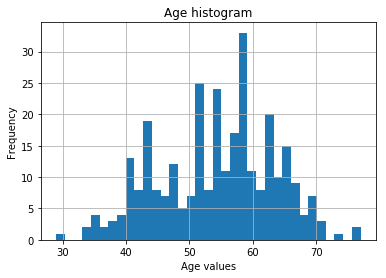

In [6]:
printHistogram(dataFrame['age'], 35, "Age histogram", "Age values", "Frequency")

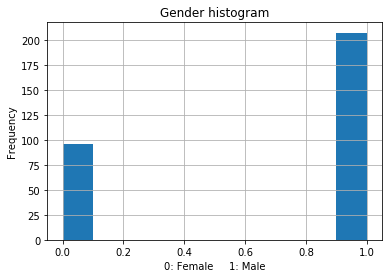

In [7]:
printHistogram(dataFrame['sex'], None, "Gender histogram", "0: Female     1: Male", "Frequency")

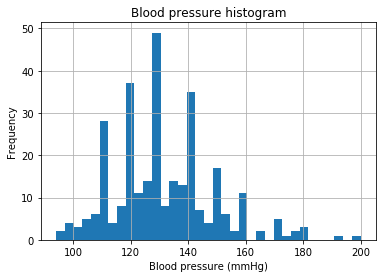

In [8]:
printHistogram(dataFrame['blood pressure'], 35, "Blood pressure histogram", "Blood pressure (mmHg)", "Frequency")

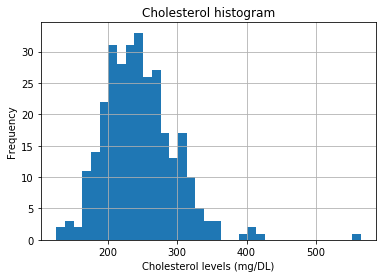

In [9]:
printHistogram(dataFrame['cholesterol'], 35, "Cholesterol histogram", "Cholesterol levels (mg/DL)", "Frequency")

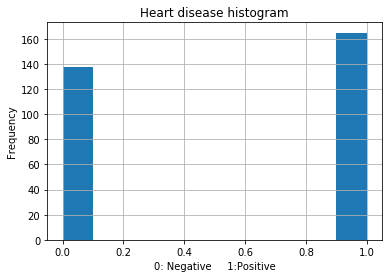

In [10]:
printHistogram(dataFrame['class'], None, "Heart disease histogram", "0: Negative     1:Positive", "Frequency")

In [11]:
menDF = dataFrame.loc[dataFrame['sex']==1] #locate rows in dataFrame where sex is 1, assume male is 1
menDF.name = "men data"
womenDF = dataFrame.loc[dataFrame['sex']==0]
womenDF.name = "women data"

In [12]:
# PROBLEM 2: a. TWO-SAMPLE T-TEST: MEN AND WOMEN ON BLOOD PRESSURE

In [13]:
h0 = "\"Men tend to have equal blood pressure to women\""
hA = "\"Women tend to have higher blood pressure than men\""

print("Null-hypothesis: "+h0)
print("Alternative hypothesis: "+ hA)

Null-hypothesis: "Men tend to have equal blood pressure to women"
Alternative hypothesis: "Women tend to have higher blood pressure than men"


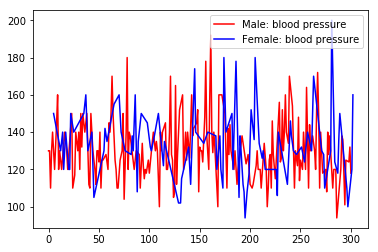

In [14]:
menDF['blood pressure'].name = "Male: blood pressure"
womenDF['blood pressure'].name = "Female: blood pressure"
plot.plot(menDF['blood pressure'],'red')
plot.plot(womenDF['blood pressure'],'blue')
plot.legend(loc="upper right")
plot.show()

In [15]:
tBP = ttest_ind(womenDF['blood pressure'], menDF['blood pressure'])
tBP

Ttest_indResult(statistic=0.98649315362083601, pvalue=0.3246834797221041)

In [16]:
def checkP(pval, hypo):
    # 4 conventions
    if(pval > 0.1):
        print("We have no evidence to reject h0: ".upper()+hypo)
    elif(0.05 < pval <= 0.1 ):
        print("We have marginally significant evidence against h0: ".upper()+hypo)
    elif(0.01 < pval <= 0.05):
        print("We have significant evidence against h0: ".upper()+hypo)
    elif(pval <= 0.1):
        print("We have highly significant evidence against h0: ".upper()+hypo)

In [17]:
checkP(tBP.pvalue,h0)

WE HAVE NO EVIDENCE TO REJECT H0: "Men tend to have equal blood pressure to women"


In [18]:
# b. TWO-SAMPLE T-TEST: MEN AND WOMEN ON CHOLESTEROL
h0 = "\"Men tend to have equal cholesterol to women\""
hA = "\"Men tend to have higher cholesterol than women\""
print("Null-hypothesis: "+h0)
print("Alternative hypothesis: "+ hA)

Null-hypothesis: "Men tend to have equal cholesterol to women"
Alternative hypothesis: "Men tend to have higher cholesterol than women"


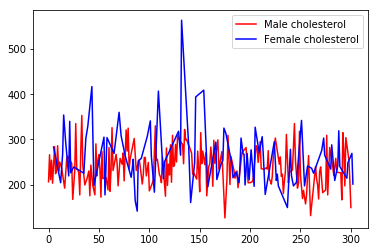

In [19]:
menDF['cholesterol'].name = "Male cholesterol"
womenDF['cholesterol'].name = "Female cholesterol"
plot.plot(menDF['cholesterol'],'red')
plot.plot(womenDF['cholesterol'],'blue')
plot.legend(loc="upper right")
#plot.xlabel("Group of ppl with cholesterol", fontsize=14)
plot.show()


In [20]:
tCl = ttest_ind(menDF['cholesterol'], womenDF['cholesterol'])
tCl

Ttest_indResult(statistic=-3.5029368327219244, pvalue=0.00052996661062266396)

In [21]:
checkP(tCl.pvalue,h0)

WE HAVE HIGHLY SIGNIFICANT EVIDENCE AGAINST H0: "Men tend to have equal cholesterol to women"


In [22]:
# PROBLEM 1: Is there any relationship between blood pressure and cholesterol?

In [23]:
# t-test for correlations using Pearson's correlation coef.:
# scipy.stats.pearsonr(x, y)
# Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.
corr, pValue=scipy.stats.pearsonr(dataFrame['blood pressure'], dataFrame['cholesterol'])
#returns correlation value ranged of -1 | 0 | 1
corr

0.12317420653239071

In [24]:
def checkApproxToZero(cr):
    try:
        np.testing.assert_approx_equal(0, corr, significant=8)
        return True
    except AssertionError:
        # an exception is yielded if the items passed in are not equal
        return False
    
# check if correlation val ~ 0, means blood pressure and cholesterol have no relation    
def checkCorrelation(cr, x, y):
    #!!!!!!!!
    if(checkApproxToZero(cr) is True):
        print(x+" and " +y+" have no relation")
    else:
        if(cr > 0):
            print(x+" and " +y+" have relation by ratio, if "+ x+" increases, "+y+" increases")
        else:
            print(x+" and " +y+" have relation by inverse ratio, if "+ x+" increases, "+y+" decreases")

checkCorrelation(corr,'blood pressure','cholesterol')

blood pressure and cholesterol have relation by ratio, if blood pressure increases, cholesterol increases


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0AA825A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D0AA4D0630>]], dtype=object)

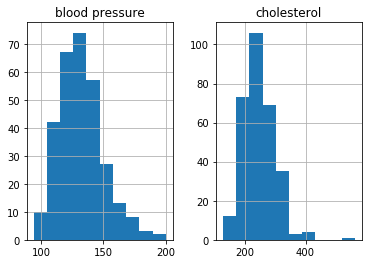

In [25]:
dataFrame[['blood pressure','cholesterol']].hist()

In [37]:
# PROBLEM 3: WHAT CONTRIBUTE TO CAUSING HEART DISEASE?
# Is the effect the same for both sex (male and female)?

def checkForPositiveValues(dict):
    return any(val > 0 for val in dict.values())

In [27]:
# TESTING WITH MALE DATA:
# Testing relation with age:
crAge1, pValue = scipy.stats.pearsonr(menDF['age'], menDF['class'])
crAge1

-0.29099299444192772

In [28]:
# Testing relation with cholesterol:
crCho1, pValue = scipy.stats.pearsonr(menDF['cholesterol'], menDF['class'])
crCho1

-0.17566508173717524

In [29]:
# Testing relation with blood pressure:
crBP1, pValue = scipy.stats.pearsonr(menDF['blood pressure'], menDF['class'])
crBP1

-0.065489419966359194

In [38]:
import operator

stats1 = {'blood pressure':crBP1, 'age':crAge1,'cholesterol':crCho1}
# Find the strongest relation:
if(checkForPositiveValues(stats1) == True):
    maleCausing = max(stats1, key = stats1.get)
else:
    maleCausing = min(stats1, key = stats1.get)

In [39]:
# TESTING WITH FEMALE DATA:
# Testing relation with age:
crAge0, pValue = scipy.stats.pearsonr(womenDF['age'], womenDF['class'])
crAge0

-0.2075308815584328

In [40]:
# Testing relation with cholesterol:
crCho0, pValue = scipy.stats.pearsonr(womenDF['cholesterol'], womenDF['class'])
crCho0

-0.12176918618704993

In [41]:
# Testing relation with blood pressure:
crBP0, pValue = scipy.stats.pearsonr(womenDF['blood pressure'], womenDF['class'])
crBP0

-0.39195738649166512

In [42]:
stats0 = {'blood pressure':crBP0, 'age':crAge0,'cholesterol':crCho0}
if(checkForPositiveValues(stats0) == True):
    femaleCausing = max(stats0, key = stats0.get)
else:
    femaleCausing = min(stats0, key = stats0.get)

In [43]:
if(femaleCausing == maleCausing):
    print("Both men and women have the same causes of heart disease "+femaleCausing)
else:
    print("The causes of heart disease are not the same on both sex:\n\t- Men's: "+maleCausing.upper()+"\n\t- Women's: "+ femaleCausing.upper())

The causes of heart disease are not the same on both sex:
	- Men's: AGE
	- Women's: BLOOD PRESSURE
